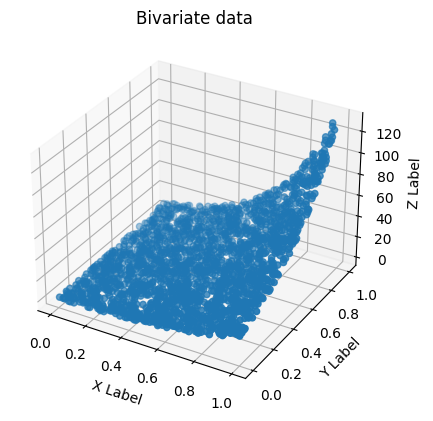

In [1]:
import numpy as np
from matplotlib import pyplot as plt
import pandas as pd
from mpl_toolkits import mplot3d

# Load the data from the CSV file
df = pd.read_csv(r"C:\Users\Asus\Documents\Python Codes\Assignments\Deep Learning\Data\Regression\BivariateData\12.csv")
data = df.to_numpy(dtype=float)

# Split the data into training and testing sets
np.random.seed(42)
np.random.shuffle(data)

# Split the data into training,Validation & testing sets
train = data[:int(0.6*len(data))]
test = data[int(0.6*len(data)):int(0.8*len(data))]
valid= data[int(0.8*len(data)):]

fig = plt.figure()
ax = plt.axes(projection='3d')

# Create the 3D scatter plot
ax.scatter(valid[:,0], valid[:,1], valid[:,2])

# Set the axis labels
ax.set_xlabel('X Label')
ax.set_ylabel('Y Label')
ax.set_zlabel('Z Label')
ax.set_title("Bivariate data")
plt.show()
# fig,axis =plt.subplots(1,3,figsize=(16,4))
# axis[0].scatter(train[:, 0], train[:, 1],edgecolors="blue",cmap="set1")
# axis[0].set_title('Univariate Training data')
# axis[0].set_xlabel("Abscissa")
# axis[0].set_ylabel("Ordinate")
# axis[1].scatter(test[:, 0], test[:, 1],edgecolors="blue",cmap="set1")
# axis[1].set_title('Univariate Testing data')
# axis[1].set_xlabel("Abscissa")
# axis[1].set_ylabel("Ordinate")
# axis[2].scatter(Validate[:, 0], Validate[:, 1],edgecolors="blue",cmap="set1")
# axis[2].set_title('Univariate Validation data')
# axis[2].set_xlabel("Abscissa")
# axis[2].set_ylabel("Ordinate")
# plt.show()
# print(train)

In [2]:
print(train[0,-1:])
print(train[0,0:2])
print(train[0])

[2.3703]
[0.26 0.05]
[0.26   0.05   2.3703]


In [3]:
def Sigmoid(x):
    return 1 / (1 + np.exp(-x))

def Update_Weight(Weight,N_In,N_Out,Yn):
    Learning_Rate=0.03
    Delta_W = Learning_Rate*np.outer(N_In,(Yn-N_Out))
    # Weight=np.add(Weight,Delta_W,out=Weight, casting='unsafe')
    Weight=Weight+Delta_W
    return Weight


#Assuming 1 hidden layers,Generalize it afterwards
def Perceptron(Data,Epoch, Learning_Rate):
         
    # W_o=np.array([[1,1,1],[1,1,1],[1,1,1],[1,1,1],[1,1,1]])    # 3 Neurons in Output Layer
    # W_h=np.array([[1,1,1,1,1],[1,1,1,1,1],[1,1,1,1,1]])        # 5 Neurons in Hidden Layer
    
    W_h1=np.random.randn(3,6)
    W_h2=np.random.randn(6,6)
    W_o=np.random.randn(6,1)

    Avg_Errors=[]
    MSE=[]
    # Learning_Rate=0.01
    while(Epoch):
        Errors=[]
        H1=[]
        H2=[]
        for i in range(len(Data)):
            # In_H1=np.concatenate([1],Data[i,:], axis=0) #Inputs to Input Layer
            In_H1=np.array([1,*Data[i,:-1]]) #Inputs to Input Layer
            Out_H1=np.matmul(W_h1.T, In_H1) #Hidden Layer Output
            Out_H1 = Sigmoid(Out_H1)
            H1.append(Out_H1)
            Out_H2=np.matmul(W_h2.T,Out_H1)
            Out_H2 = Sigmoid(Out_H2)
            H2.append(Out_H2)
            # print(Out_H1) #Debug
            
            Y_pred=np.matmul(Out_H2,W_o) #Output of FCNN          
            Y_pred.shape
            Y_GT=Data[i,-1:]           
            Error=0.5*(Y_GT-Y_pred)**2
            Errors.append(Error)

            #Weight Updation
            delta_o = (Y_GT - Y_pred)
            W_o = W_o + (Learning_Rate * np.outer(Out_H2, delta_o))
            # print(W_o)
            var1 = np.matmul(W_o, (Y_GT-Y_pred))
            var2 = Out_H2*(1-Out_H2)
            delta_h2 = np.matmul(W_o, delta_o)*Out_H2*(1-Out_H2)
            W_h2 = W_h2 + (Learning_Rate*np.outer(Out_H1,delta_h2))
            var1 = np.matmul(W_h2, var1*var2)
            var2 = Out_H1*(1-Out_H1)
            delta_h1 = np.matmul(W_h2, delta_h2)*Out_H1*(1-Out_H1)
            W_h1 = W_h1 + (Learning_Rate*np.outer(In_H1,delta_h1))
        
        Epoch-=1
        Avg_Error=np.mean(Errors)
        Avg_Errors.append(Avg_Error)
        MSE.append(np.sqrt(np.mean(Errors)))
    return W_o,W_h1,W_h2,Avg_Errors,MSE,H1,H2

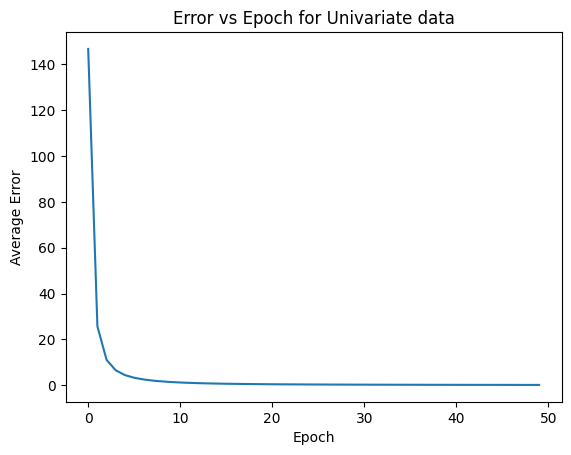

In [4]:
np.random.seed(10)
W_o,W_h1, W_h2,Avg_Errors,MSE,H1,H2 = Perceptron(train,50, 0.0005)

plt.plot(Avg_Errors)
plt.title("Error vs Epoch for Univariate data")
plt.xlabel("Epoch")
plt.ylabel("Average Error")
plt.show()

Text(0.5, 0.92, '6th Neuron')

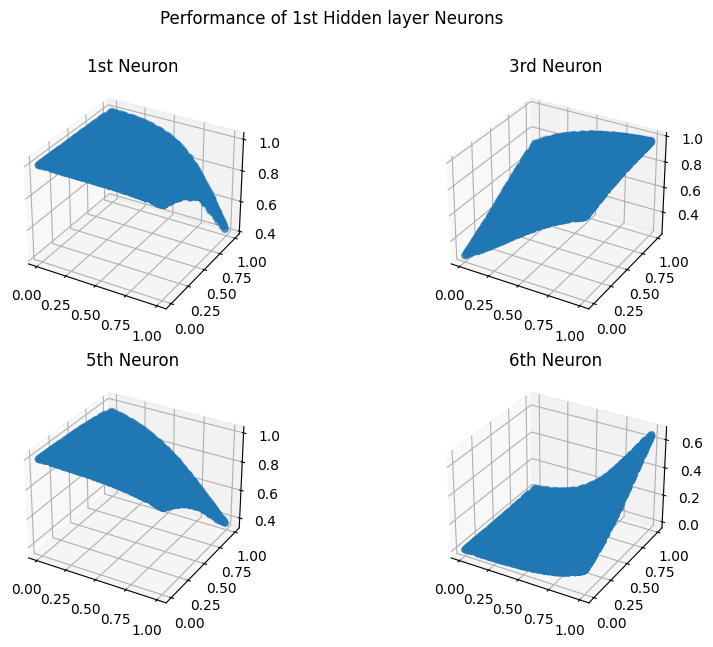

In [16]:
H1=np.array(H1)

plt.figure(figsize=(10, 7))
plt.suptitle("Performance of 1st Hidden layer Neurons")
ax = plt.subplot(2, 2, 1, projection='3d')
ax.scatter(train[:,0], train[:,1],H1[:,0])
ax.set_title("1st Neuron")

ax = plt.subplot(2, 2, 2,projection='3d')
ax.scatter(train[:,0], train[:,1],H1[:,2])
ax.set_title("3rd Neuron")

ax = plt.subplot(2, 2, 3,projection='3d')
ax.scatter(train[:,0], train[:,1],H1[:,4])
ax.set_title("5th Neuron")

ax = plt.subplot(2, 2, 4,projection='3d')
ax.scatter(train[:,0], train[:,1],H1[:,5])
ax.set_title("6th Neuron")


Text(0.5, 0.92, '6th Neuron')

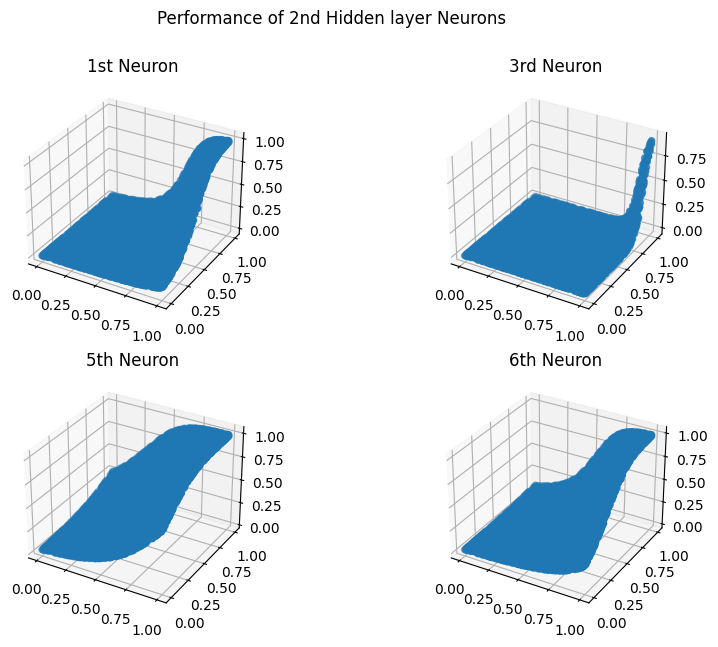

In [17]:
H2=np.array(H2)

plt.figure(figsize=(10, 7))
plt.suptitle("Performance of 2nd Hidden layer Neurons")
ax = plt.subplot(2, 2, 1, projection='3d')
ax.scatter(train[:,0], train[:,1],H2[:,0])
ax.set_title("1st Neuron")

ax = plt.subplot(2, 2, 2,projection='3d')
ax.scatter(train[:,0], train[:,1],H2[:,2])
ax.set_title("3rd Neuron")

ax = plt.subplot(2, 2, 3,projection='3d')
ax.scatter(train[:,0], train[:,1],H2[:,4])
ax.set_title("5th Neuron")

ax = plt.subplot(2, 2, 4,projection='3d')
ax.scatter(train[:,0], train[:,1],H2[:,5])
ax.set_title("6th Neuron")


Text(0.5, 0.92, 'Bivariate data')

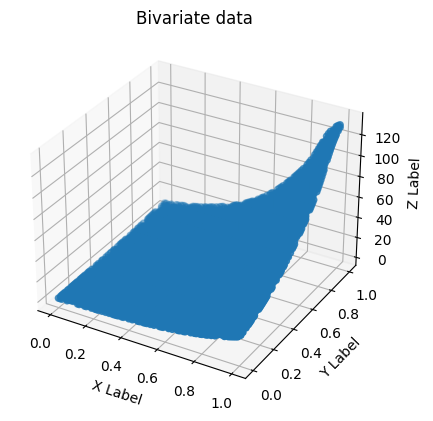

In [5]:
train_op=[]
for i in train:
    O1=np.matmul(np.array([1,i[0],i[1]]),W_h1)
    O1 = Sigmoid(O1)
    O2=Sigmoid(np.matmul(O1,W_h2))
    O3=np.matmul(O2,W_o)
    train_op.append(O3)
train_op = np.concatenate(train_op)
# print(train_op)
fig = plt.figure()
ax = plt.axes(projection='3d')

# Create the 3D scatter plot
ax.scatter(train[:,0], train[:,1], train_op)

# Set the axis labels
ax.set_xlabel('X Label')
ax.set_ylabel('Y Label')
ax.set_zlabel('Z Label')
ax.set_title("Bivariate data")
# plt.show()

Text(0.5, 0.92, 'Bivariate data')

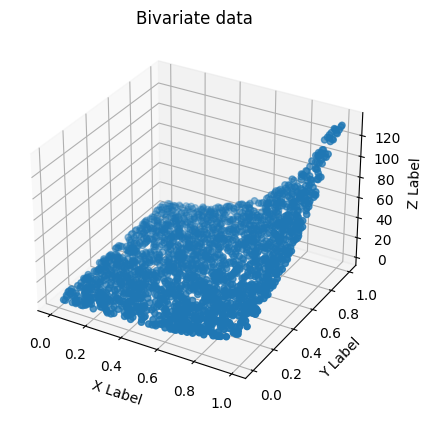

In [6]:
test_op=[]
for i in test:
    O1=np.matmul(np.array([1,i[0],i[1]]),W_h1)
    O1 = Sigmoid(O1)
    O2=Sigmoid(np.matmul(O1,W_h2))
    O3=np.matmul(O2,W_o)
    test_op.append(O3)
test_op = np.concatenate(test_op)
# print(train_op)
fig = plt.figure()
ax = plt.axes(projection='3d')

# Create the 3D scatter plot
ax.scatter(test[:,0], test[:,1], test_op)

# Set the axis labels
ax.set_xlabel('X Label')
ax.set_ylabel('Y Label')
ax.set_zlabel('Z Label')
ax.set_title("Bivariate data")
# plt.show()

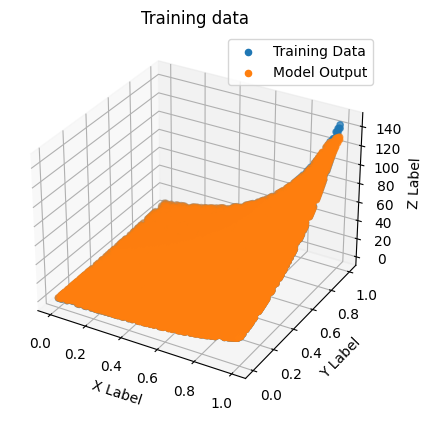

In [7]:
valid_op=[]
for i in valid:
    O1=np.matmul(np.array([1,i[0],i[1]]),W_h1)
    O1 = Sigmoid(O1)
    O2=Sigmoid(np.matmul(O1,W_h2))
    O3=np.matmul(O2,W_o)
    valid_op.append(O3)
valid_op = np.concatenate(valid_op)
# print(train_op)
fig = plt.figure()
ax = plt.axes(projection='3d')

# Create the 3D scatter plot
ax.scatter(train[:,0], train[:,1], train[:,2],label='Training Data')

ax.scatter(train[:,0], train[:,1], train_op,label='Model Output')

# Set the axis labels
ax.set_xlabel('X Label')
ax.set_ylabel('Y Label')
ax.set_zlabel('Z Label')
ax.set_title("Training data")
plt.legend()
# plt.show()

Text(0.5, 1.0, 'Mean Square Error for Training & Testing data ')

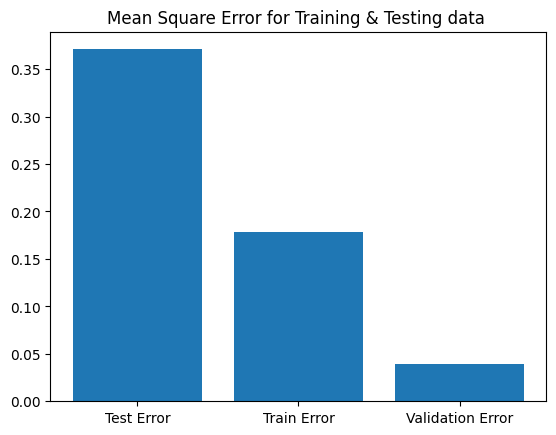

In [8]:
from sklearn.metrics import mean_squared_error
mse_test = mean_squared_error(test[:,2], test_op)
mse_train = mean_squared_error(train[:,2],train_op)
mse_validation = mean_squared_error(valid[:,2],valid_op)

plt.bar(["Test Error","Train Error","Validation Error"],[mse_test,mse_train,mse_validation])
plt.title("Mean Square Error for Training & Testing data ")


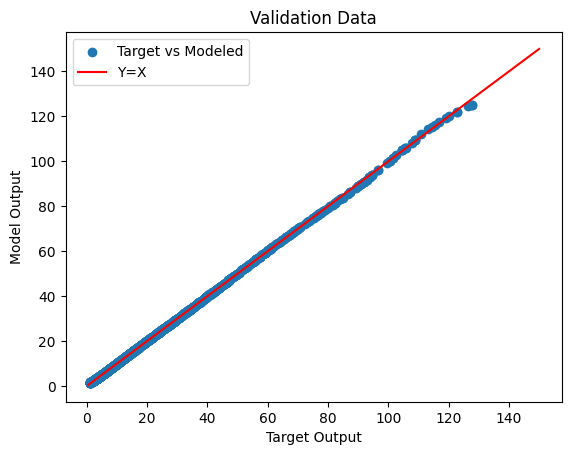

In [9]:
plt.scatter(valid[:,2],valid_op,label='Target vs Modeled')
plt.plot([0.5,150] , [0.5,150] , color = 'r' , label = 'Y=X')
plt.title("Validation Data")
plt.xlabel("Target Output")
plt.ylabel("Model Output")
plt.legend()

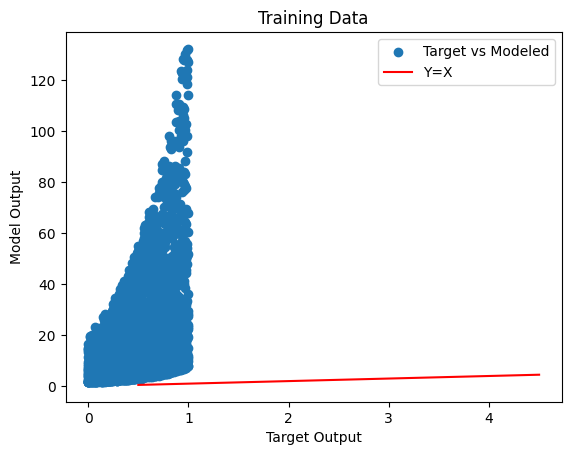

In [10]:
plt.scatter(test[:,1],test_op,label='Target vs Modeled')
plt.plot([0.5,4.5] , [0.5,4.5] , color = 'r' , label = 'Y=X')
plt.title("Training Data")
plt.xlabel("Target Output")
plt.ylabel("Model Output")
plt.legend()

In [11]:
plt.scatter(Validate[:,1],validation_op,label='Target vs Modeled')
plt.plot([0.5,4.5] , [0.5,4.5] , color = 'r' , label = 'Y=X')
plt.title("Validation Data")
plt.xlabel("Target Output")
plt.ylabel("Model Output")
plt.legend()

NameError: name 'Validate' is not defined